# First Experiment Analysis - March 24

## Limitations of current experiment state

- Cursor experiment GUI is only set to have targets at the top of the screen
- Green feedback when target reached, but doesn't stop that trial
- Cursor can "fall off" the edges of the GUI
- Pre-experiment average can vary significantly and affect results
- No "score keeping" output
- No annotations/events in file to aid in epoching
- No rejection parameters for PSD result

In [12]:
import mne
import numpy as np

In [32]:
import os

def read_experiment_data(data_filename: str) -> mne.io.RawArray:
    with open(os.path.join('..', 'data', data_filename), 'r') as data_file:
        file_lines = data_file.readlines()

    sample_lines = file_lines[5:]  # skip header and bad first sample

    electrodes = [[] for _ in range(8)]  # 2d array - list of list of sample values
    for line in sample_lines:
        all_electrodes = line.split(',')[1:9]
        for idx, electrode_datum in enumerate(all_electrodes):
            electrodes[idx].append(electrode_datum)

    numpy_electrode_data = np.array(electrodes)
    print(f"Read from file with data shape: {numpy_electrode_data.shape}")

    samp_freq = 250
    channel_types = ['eeg' for _ in range(8)]
    channel_names = ["o1", "c3", "fp2", "fp1", "c4", "cz", "fz", "o2"]
    info = mne.create_info(ch_names=channel_names, sfreq=samp_freq, ch_types=channel_types)
    print(info)

    raw = mne.io.RawArray(numpy_electrode_data, info)
    return raw

Read from file with data shape: (8, 41238)
<Info | 7 non-empty values
 bads: []
 ch_names: o1, c3, fp2, fp1, c4, cz, fz, o2
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
Creating RawArray with float64 data, n_channels=8, n_times=41238
    Range : 0 ... 41237 =      0.000 ...   164.948 secs
Ready.
Effective window size : 8.192 (s)


<ipython-input-33-a1578ee8ed05>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.crop(5).plot_psd()


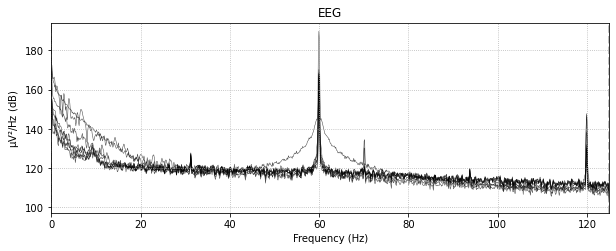

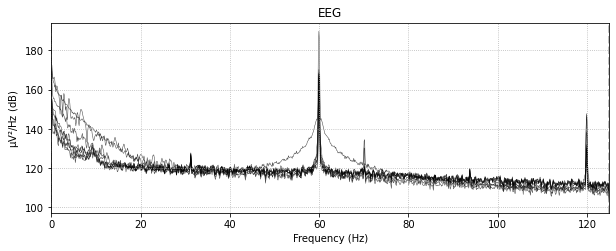

In [33]:
raw = read_experiment_data('experiment-avg1.7-2021-03-24T12:05:56.214528.txt')
raw.crop(5).plot_psd()